In [1]:
import sys

sys.path.append("../")
sys.path.append("../cascade")
sys.path.append("../data_analysis")


from cascade.cascade_driver import CascadeDriver, CascadeEvent
from cascade.particle_event import CascadeParticle

shower = CascadeDriver(CascadeEvent(1e3))

 |                                                  |
 |                 S I B Y L L  2.3d                |
 |                                                  |
 |         HADRONIC INTERACTION MONTE CARLO         |
 |                        BY                        |
 |            Eun-Joo AHN, Felix RIEHN              |
 |      R. ENGEL, A. FEDYNITCH, R.S. FLETCHER,      |
 |       T.K. GAISSER, P. LIPARI, T. STANEV         |
 |                                                  |
 | Publication to be cited when using this program: |
 | Eun-Joo AHN et al., Phys.Rev. D80 (2009) 094003  |
 | F. RIEHN et al., hep-ph: 1912.03300              |
 | last modifications: F. Riehn (05/20/2020)        |

 SIG_AIR_INI: initializing target: (i,A)           1           0 air..
 SIG_AIR_INI: initializing target: (i,A)           2          14 nit..
 SIG_AIR_INI: initializing target: (i,A)           3          16 oxy..


In [2]:
particle = CascadeParticle(2212, 1e8, 0)
shower.run(particle)

Pstack = 73, Fstack = 4279, Iterations = 1000, Decaying = 15928
Pstack = 112, Fstack = 8671, Iterations = 2000, Decaying = 34069
Pstack = 121, Fstack = 13095, Iterations = 3000, Decaying = 51471
Pstack = 83, Fstack = 18114, Iterations = 4000, Decaying = 68716
Pstack = 45, Fstack = 22339, Iterations = 5000, Decaying = 85124
Pstack = 48, Fstack = 26718, Iterations = 6000, Decaying = 102320
Pstack = 46, Fstack = 31342, Iterations = 7000, Decaying = 119633
Pstack = 155, Fstack = 35846, Iterations = 8000, Decaying = 136393
Pstack = 138, Fstack = 40109, Iterations = 9000, Decaying = 153969
Pstack = 123, Fstack = 44858, Iterations = 10000, Decaying = 169559
Pstack = 114, Fstack = 49548, Iterations = 11000, Decaying = 187030
Pstack = 154, Fstack = 54053, Iterations = 12000, Decaying = 204563
Pstack = 62, Fstack = 58465, Iterations = 13000, Decaying = 221132
Pstack = 82, Fstack = 63039, Iterations = 14000, Decaying = 239303
Pstack = 32, Fstack = 67498, Iterations = 15000, Decaying = 256069
Psta

In [ ]:
cas_event.set_decay_on(True)

import importlib
import cascade
from cascade.cascade_driver import CascadeDriver
importlib.reload(cascade.cascade_driver)
shower = CascadeDriver(cas_event)
shower.run(init_particle)

In [3]:
from data_analysis import CascadeAnalysis
import importlib
import data_analysis
importlib.reload(data_analysis)

ca = CascadeAnalysis(shower)

ca.print_stats()

Number of final particles = 947655
Number of events = 929537:
 interactions = 13481, decays = 0


{22: 290882, 14: 145700, -14: 145211, -13: 61902, 13: 61413, -11: 46262, 11: 45167, 12: 44464, -12: 43369, 2212: 16219, 2112: 14267, -211: 10691, 211: 10477, -2112: 5427, -2212: 4905, 130: 901, -321: 198, 321: 197, 3112: 1, -3122: 1, 310: 1}


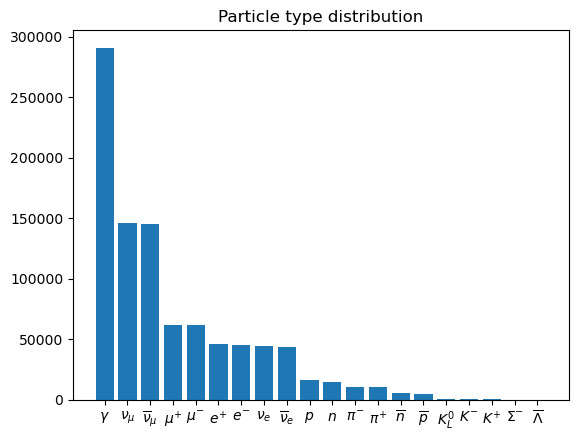

In [4]:
ca.plot_pid(to_=-1)

In [38]:
etot = 0
for i in shower.get_particles():
    etot += i.energy
    
print((etot - 1e8)/1e8, etot)    

0.0001579024905322492 100015790.24905322


In [36]:
ind = 0
for i in shower.get_particles():
    if i.energy < 5 and ind < 10:
        print(i)
        ind += 1

CascadeParticle(pid=2112, energy=0.9455561712384224, xdepth=24.186117421473224, production_mode=1, generation_number=1, final_code=2, xdepth_decay=0, parent=[CascadeParticle(pid=2212, energy=100000000.0, xdepth=0, production_mode=0, generation_number=0, final_code=0, xdepth_decay=0, parent=[])])
CascadeParticle(pid=2112, energy=1.1520946621894836, xdepth=24.186117421473224, production_mode=1, generation_number=1, final_code=2, xdepth_decay=0, parent=[CascadeParticle(pid=2212, energy=100000000.0, xdepth=0, production_mode=0, generation_number=0, final_code=0, xdepth_decay=0, parent=[])])
CascadeParticle(pid=2112, energy=2.4846059796982445, xdepth=159.27838011092976, production_mode=1, generation_number=2, final_code=2, xdepth_decay=0, parent=[CascadeParticle(pid=130, energy=2727209.2625494953, xdepth=24.186117421473224, production_mode=1, generation_number=1, final_code=0, xdepth_decay=0, parent=[CascadeParticle(pid=2212, energy=100000000.0, xdepth=0, production_mode=0, generation_numbe

Min = 0.00 km, Max = 25.78 km


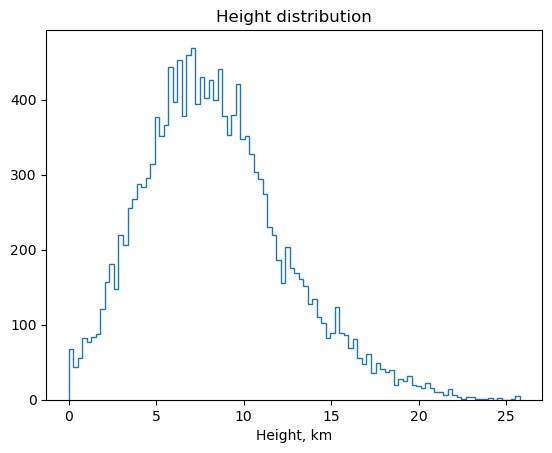

In [6]:
ca.plot_height(2212)

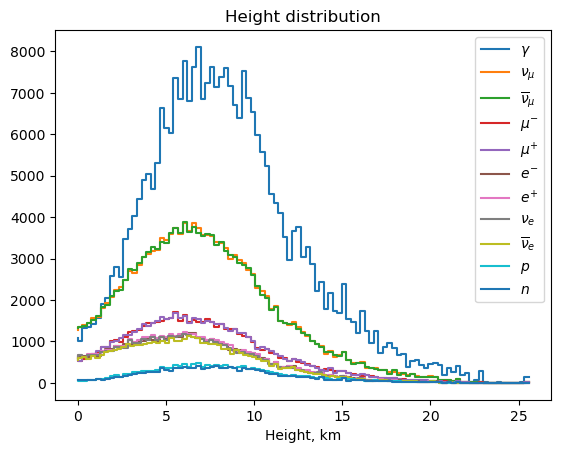

In [30]:
ca.plot_height_list(pids = [22,14, -14, 13, -13, 11, -11, 12, -12, 2212, 2112], all_pids = False)

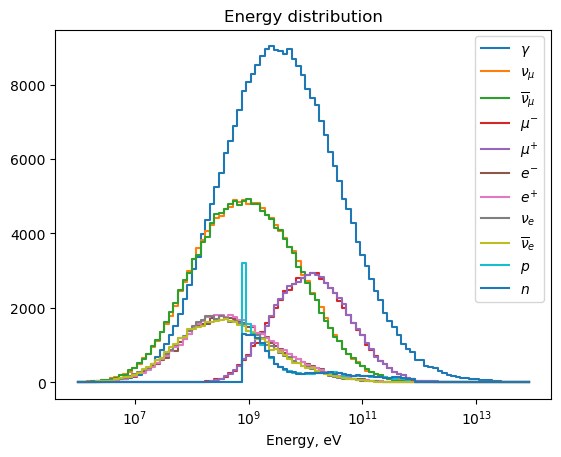

In [34]:
ca.plot_energy_list(pids = [22,14, -14, 13, -13, 11, -11, 12, -12, 2212, 2112],
                    all_pids = False, xrange = (1e6, 1e14), nbins = 100)

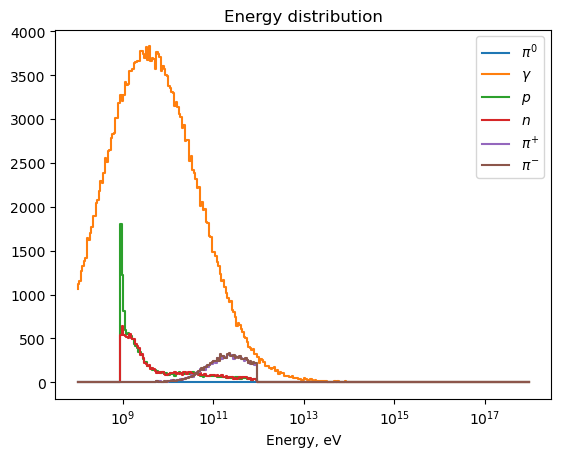

In [9]:
ca.plot_energy_list(pids = [111,22,2212, 2112, 211, -211],
                    all_pids = False, xrange = (1e8, 1e18), nbins = 300)

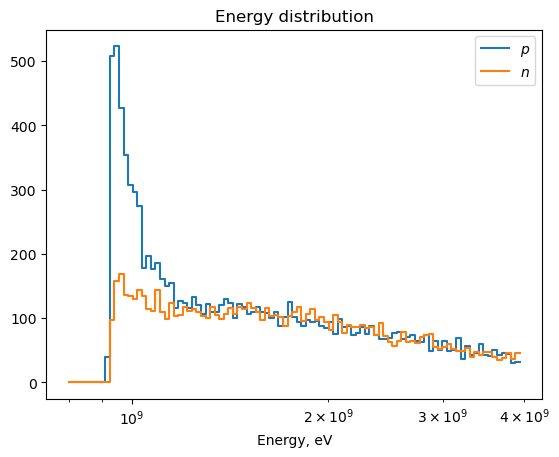

In [15]:
ca.plot_energy_list(pids = [2212, 2112],
                    all_pids = False, xrange = (8e8, 4e9), nbins = 100)

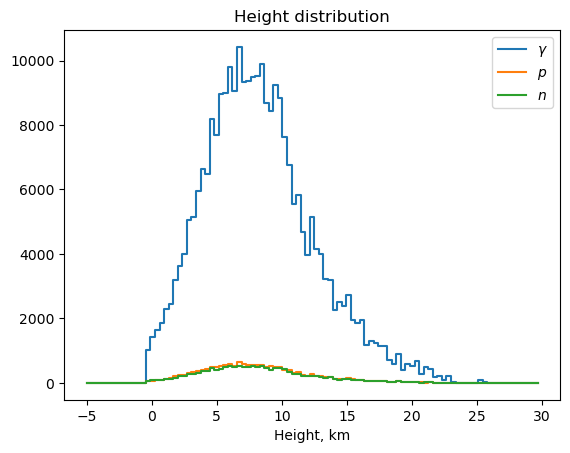

In [25]:
ca.plot_height_list(pids = [22, 2212, 2112],
                    all_pids = False, xrange = (-5, 30),
                    energy_range = (1e8, 1e13),
                    nbins = 100)

In [ ]:
# import importlib
# import cascade.particle_event
# importlib.reload(cascade.particle_event)
# from cascade.particle_event import CascadeParticle


pt = shower.get_particles()



for p in pt:
    if p.generation_number > 5:
        print(p.get_parents())
        break